In [1]:
import pandas as pd

# Ruta del primer archivo CSV
file_path1 = 'dailyActivity3-4.csv'

# Ruta del segundo archivo CSV
file_path2 = 'dailyActivity4-5.csv'

# Cargar el primer archivo CSV en un DataFrame
df1 = pd.read_csv(file_path1)

# Cargar el segundo archivo CSV en otro DataFrame
df2 = pd.read_csv(file_path2)

# Concatenar df2 al final de df1
df = pd.concat([df1, df2], ignore_index=True)

# Seleccionar todas las columnas excepto 'TrackerDistance', 'Date' y 'LoggedActivitiesDistance'
df = df.drop(columns=['TrackerDistance', 'LoggedActivitiesDistance', 'ActivityDate'])

# Suponiendo que 'df' es tu DataFrame
# df = pd.DataFrame(...)

# Identificar las filas donde 'TotalSteps' es igual a 0
rows_to_drop = df[df['TotalSteps'] == 0].index

# Eliminar esas filas del DataFrame
df = df.drop(rows_to_drop)

# Obtener los nombres de las columnas como un array
column_names = df.columns.to_list()

# Imprimir el array de nombres de columnas
print(column_names)

['Id', 'TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']


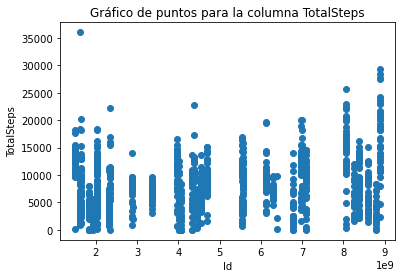

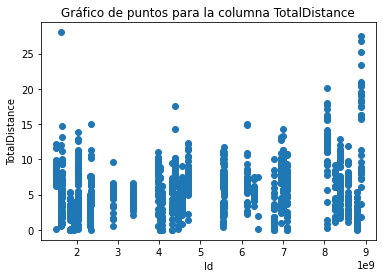

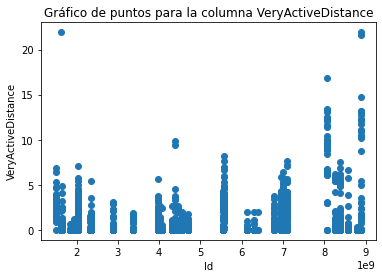

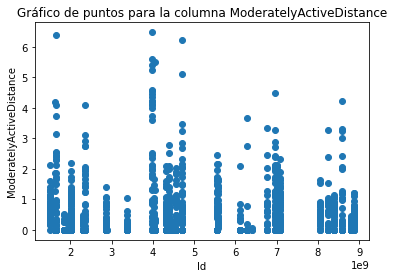

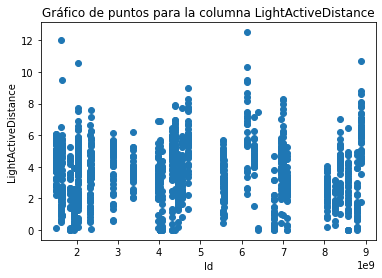

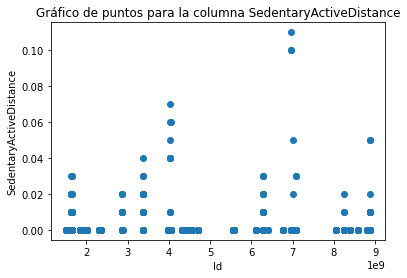

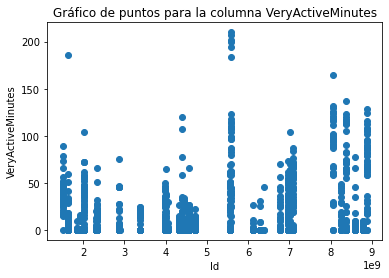

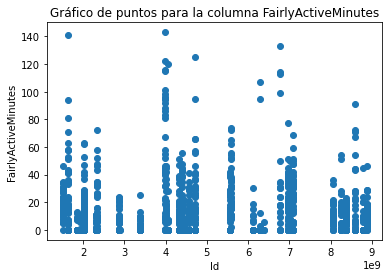

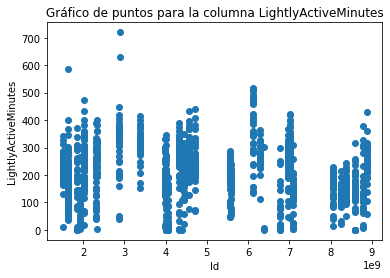

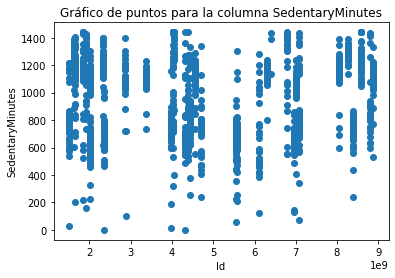

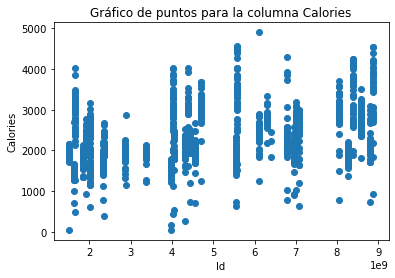

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre cada columna y generar un gráfico de puntos
for column in df.columns:
    if column != 'Id': # Excluir la columna 'Id'
        plt.figure() # Crear una nueva figura para cada gráfico
        plt.scatter(df['Id'], df[column]) # Dibujar el gráfico de puntos
        plt.title(f'Gráfico de puntos para la columna {column}') # Título del gráfico
        plt.xlabel('Id') # Etiqueta del eje x
        plt.ylabel(column) # Etiqueta del eje y
        plt.show() # Mostrar el gráfico

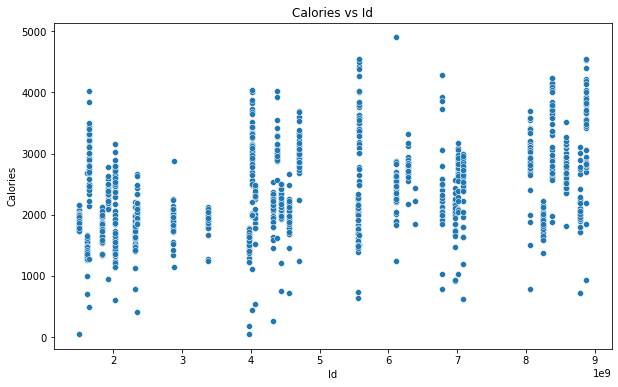

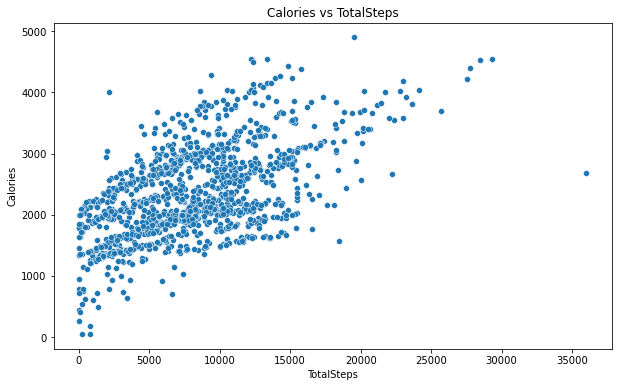

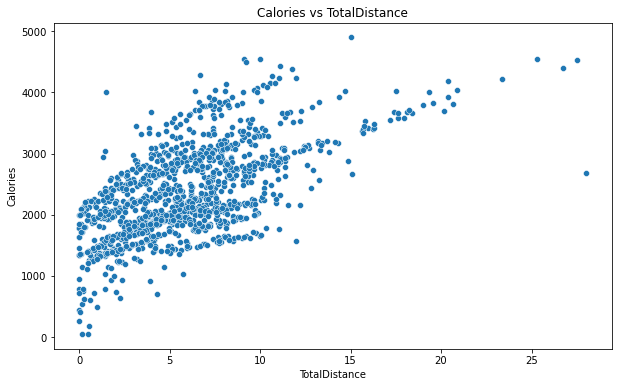

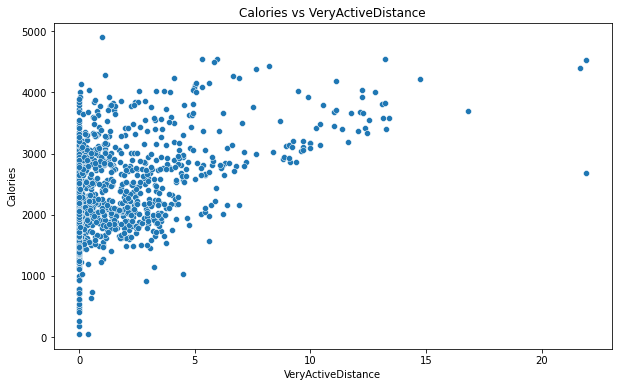

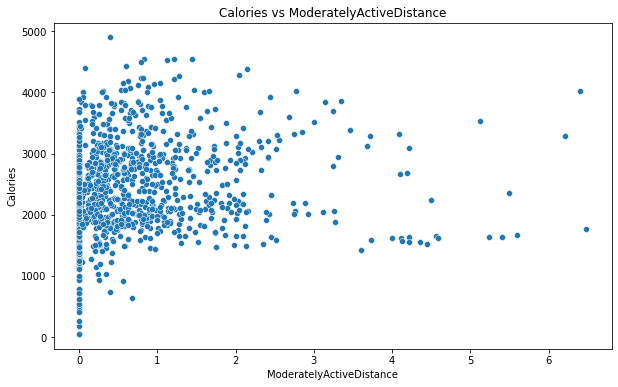

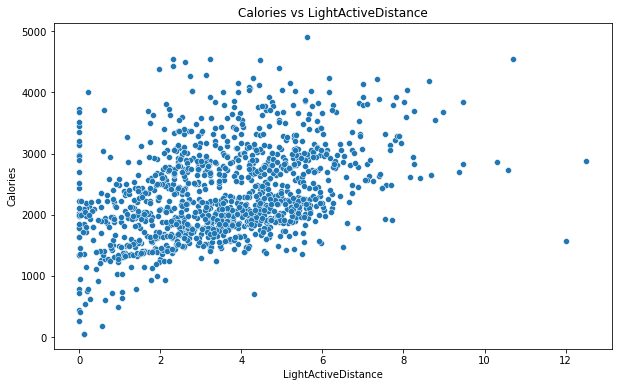

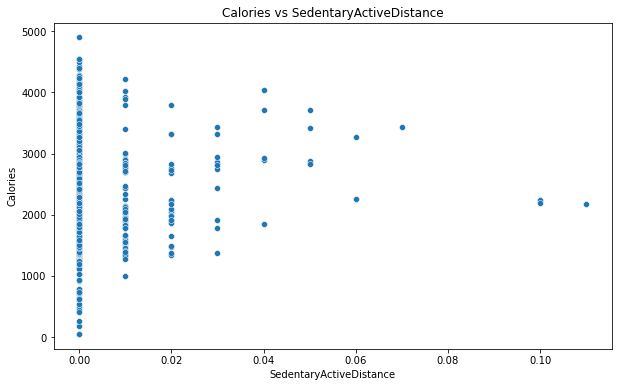

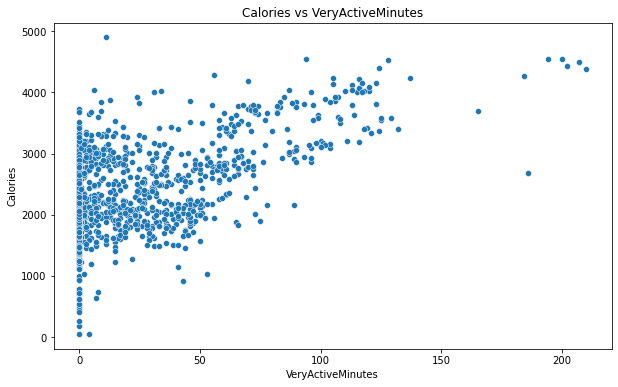

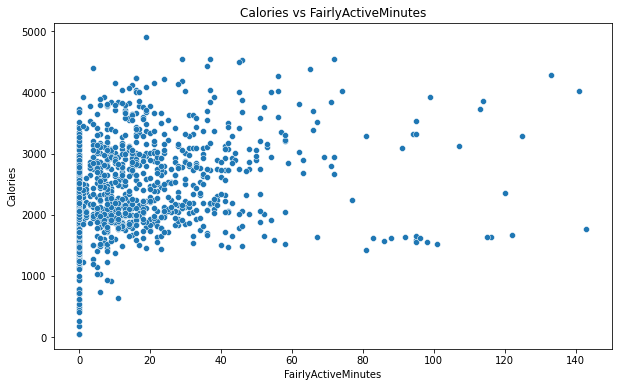

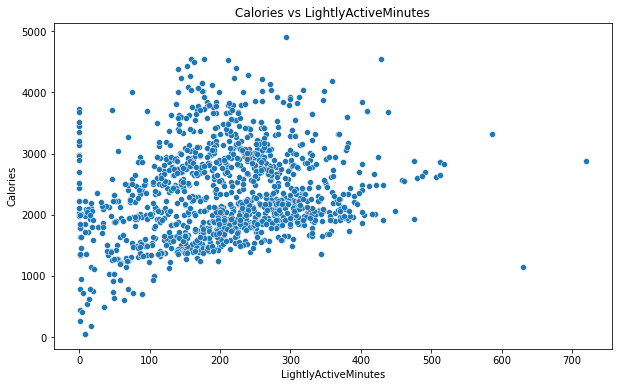

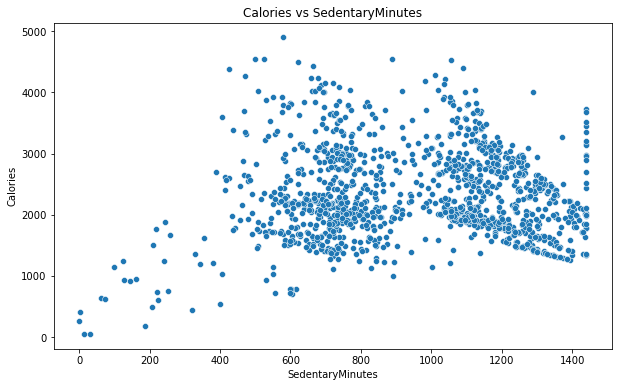

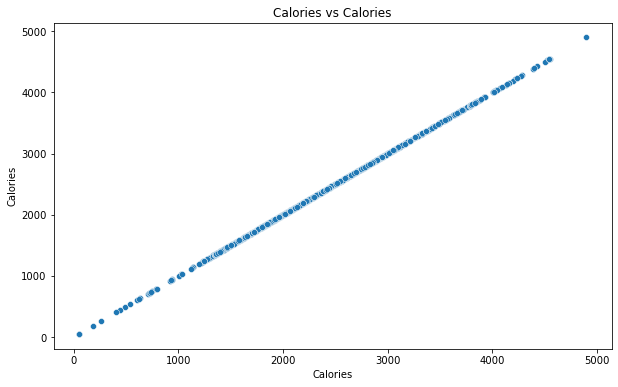

In [3]:
import seaborn as sns

# Identificar las columnas que terminan en "Minutes"
minutes_columns = [col for col in df.columns if col.endswith('Minutes')]

# Iterar sobre las columnas identificadas y generar un gráfico de puntos
for column in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=f'{column}', y='Calories', data=df)
    plt.title(f'Calories vs {column}')
    plt.show()

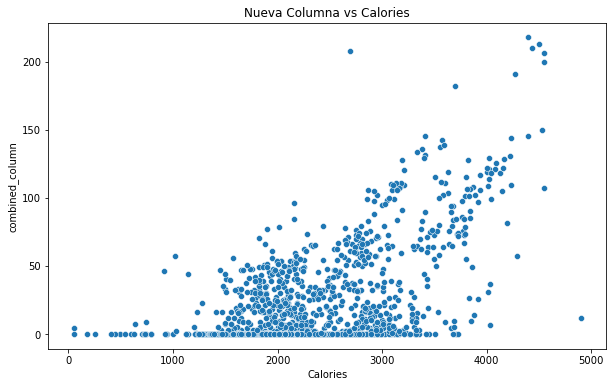

In [4]:
# Combinar column1 y column2 en una nueva columna
df['combined_column'] = df['VeryActiveMinutes'] + df['VeryActiveDistance']

# Trazar combined_column con other_column
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Calories', y='combined_column', data=df)
plt.title('Nueva Columna vs Calories')
plt.show()

                                Id  TotalSteps  TotalDistance  \
Id                        1.000000    0.206638       0.263963   
TotalSteps                0.206638    1.000000       0.983116   
TotalDistance             0.263963    0.983116       1.000000   
VeryActiveDistance        0.324726    0.751289       0.807552   
ModeratelyActiveDistance  0.033274    0.488835       0.450397   
LightActiveDistance       0.029533    0.643040       0.612177   
SedentaryActiveDistance  -0.018180    0.043926       0.053362   
VeryActiveMinutes         0.329641    0.673252       0.685382   
FairlyActiveMinutes       0.060269    0.472828       0.438145   
LightlyActiveMinutes     -0.103145    0.475313       0.424368   
SedentaryMinutes         -0.047862   -0.164052      -0.133464   
Calories                  0.420672    0.561646       0.616876   
combined_column           0.333294    0.687525       0.703218   

                          VeryActiveDistance  ModeratelyActiveDistance  \
Id             

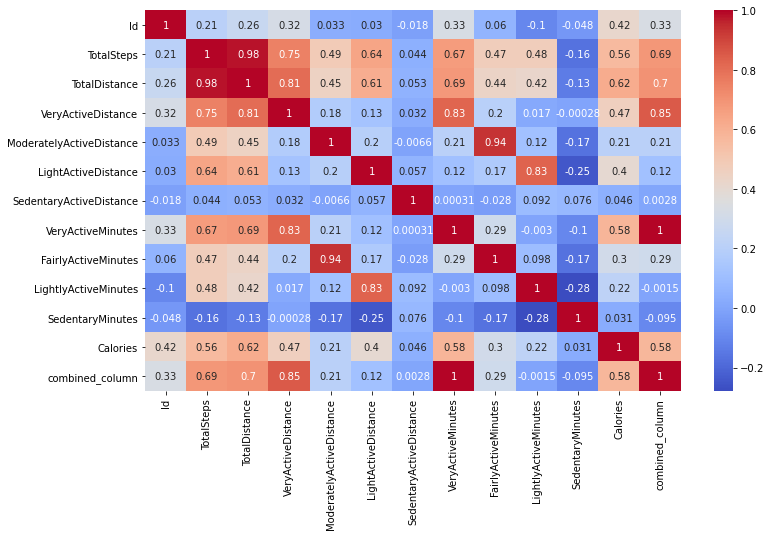

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Suponiendo que 'Date' es el nombre de la columna de fecha
# df1 = df.drop(columns=['ActivityDate'])

correlation_matrix = df.corr()
print(correlation_matrix)

fig, ax = plt.subplots(figsize=(12, 7)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1) # Variables independientes
y = df['Calories'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.model_selection import train_test_split

# Suponiendo que df es tu DataFrame
X = df.loc[:, ['TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'VeryActiveMinutes']]
y = df['Calories'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Imprimir un resumen del modelo
print(model.summary())

AttributeError: module 'numpy' has no attribute 'MachAr'

In [ ]:
# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 161008.16394971524
Coeficiente de Determinación R^2: 0.636612192517957


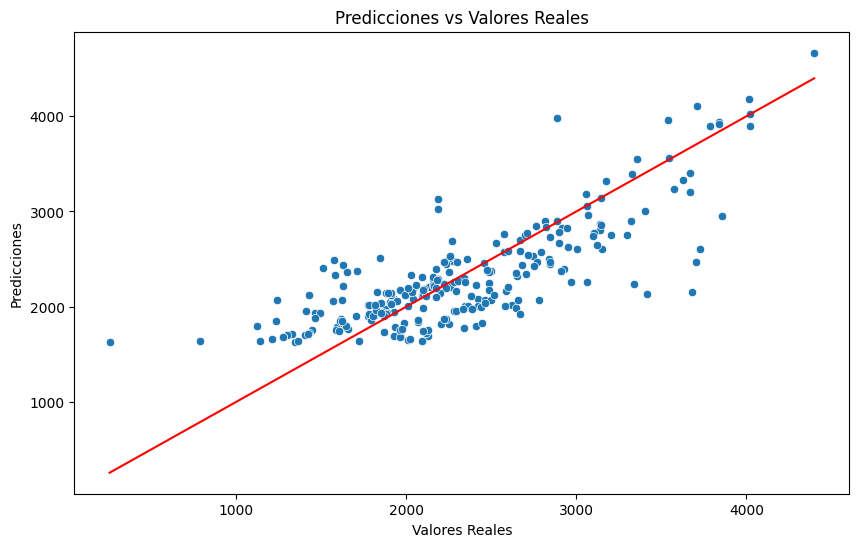

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

In [ ]:
residuos = model.resid

In [ ]:
import numpy as np

media_residuos = np.mean(residuos)
suma_residuos = np.sum(residuos)

print(f"Media de los residuos: {media_residuos}")

if np.isclose(media_residuos, 0):
    print("La media de los residuos es cero.")
else:
    print("La media de los residuos no es cero.")

print(f"Suma de los residuos: {suma_residuos}")

if np.isclose(suma_residuos, 0):
    print("La suma de los residuos es cero.")
else:
    print("La suma de los residuos no es cero.")


Media de los residuos: -1.7051896692624515e-12
La media de los residuos es cero.
Suma de los residuos: -1.7171259969472885e-09
La suma de los residuos es cero.


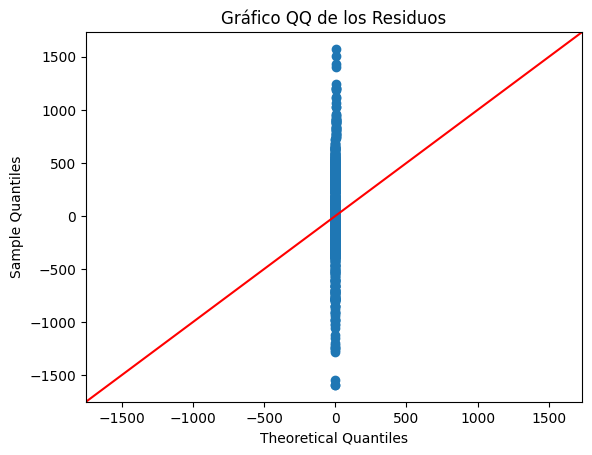

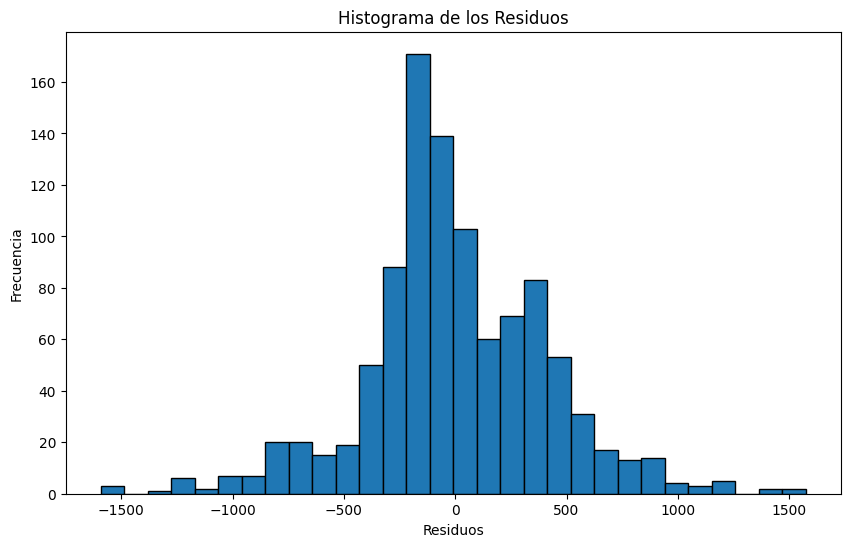

D = 0.5471695321920993, p-value = 2.221386918495271e-283
Los residuos no parecen estar normalmente distribuidos.


In [ ]:
from scipy.stats import kstest

# Gráfico QQ de los residuos
fig = sm.qqplot(residuos, line='45')
plt.title('Gráfico QQ de los Residuos')
plt.show()

# Histograma de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# Realizar la prueba del Kolmogorov-Smirnov para verificar la normalidad de los residuos
D, p_value = kstest(residuos, 'norm')

print(f"D = {D}, p-value = {p_value}")

if p_value > 0.05:
    print("Los residuos parecen estar normalmente distribuidos.")
else:
    print("Los residuos no parecen estar normalmente distribuidos.")

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Realizar el test de Durbin-Watson
dw_stat = durbin_watson(model.resid)

print(f"Estadística de Durbin-Watson: {dw_stat}")

# Interpretación de la estadística de Durbin-Watson
if 1.5 < dw_stat < 2.5:
    print("No hay autocorrelación en los residuos.")
elif dw_stat < 1.5:
    print("Hay autocorrelación positiva en los residuos.")
else:
    print("Hay autocorrelación negativa en los residuos.")

Estadística de Durbin-Watson: 2.019405569745741
No hay autocorrelación en los residuos.


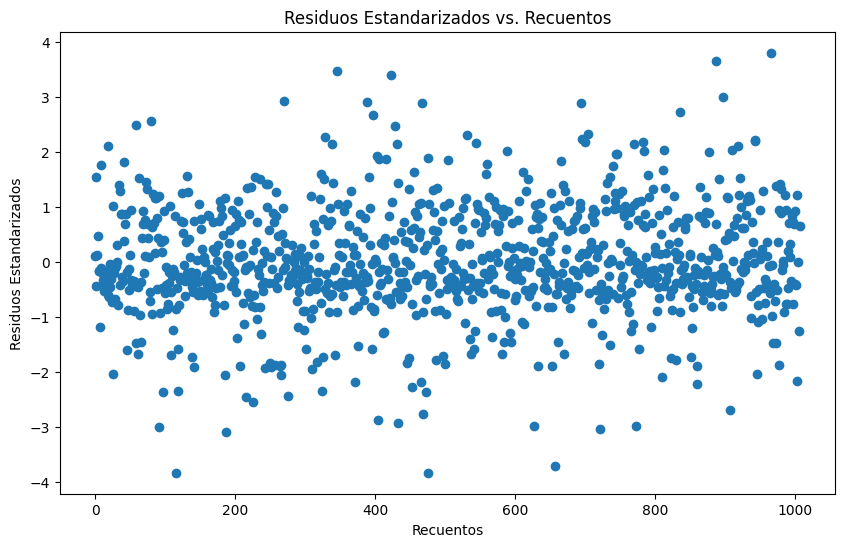

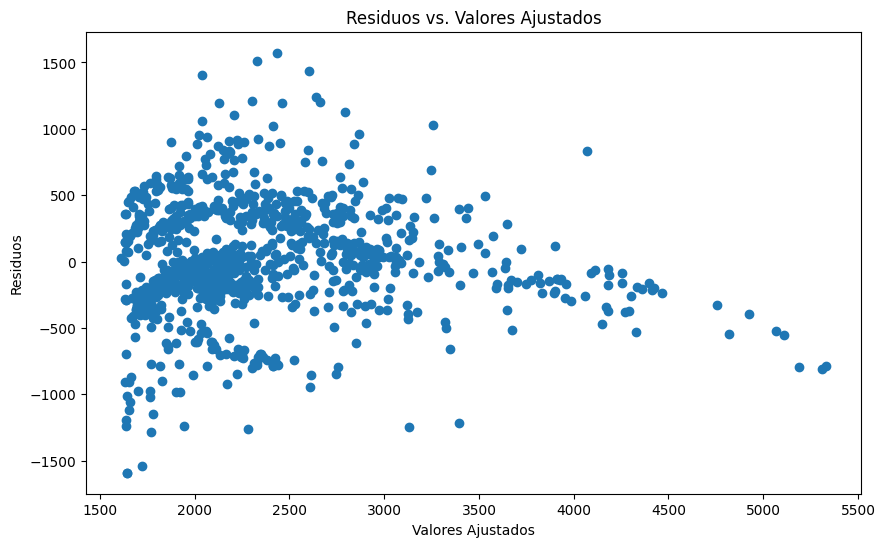

[('Lagrange multiplier statistic', 18.454413234574453), ('p-value', 0.0010056158565653417), ('f-value', 4.676395886189773), ('f p-value', 0.000962475936947833)]


In [ ]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Calcular los residuos estandarizados
residuos_estandarizados = residuos / np.std(residuos)

# Gráfico de residuos estandarizados contra recuentos
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuos_estandarizados)), residuos_estandarizados)
plt.title('Residuos Estandarizados vs. Recuentos')
plt.xlabel('Recuentos')
plt.ylabel('Residuos Estandarizados')
plt.show()

# Gráfico de residuos vs. valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuos)
plt.title('Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()


# Realizar el test de Breusch-Pagan
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

# Imprimir los resultados del test
print(lzip(names, test))

In [ ]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1) # Variables independientes
y = df['Calories'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Prediccion por arboles de decision

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Crear y entrenar el modelo
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Para predecir Calories
predicted_calories = model.predict(X_test)

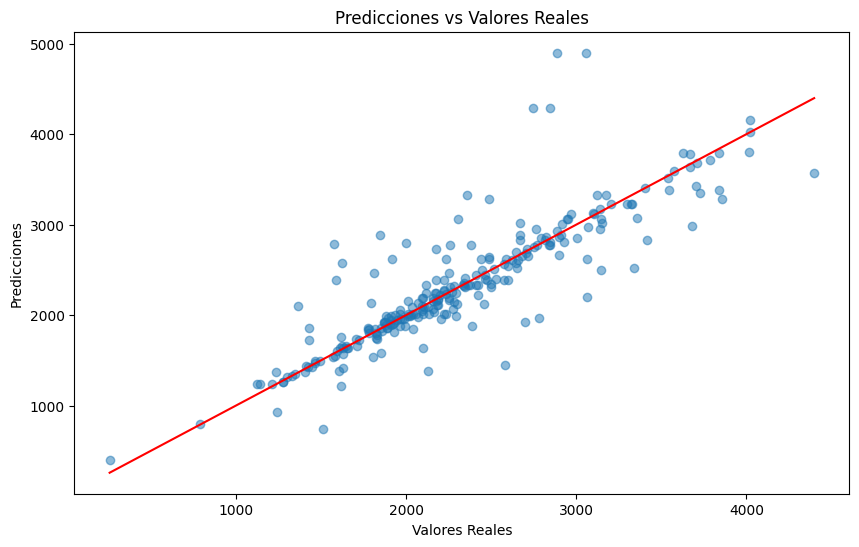

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted_calories, alpha=0.5)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r-')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

In [ ]:
import statsmodels.api as sm

# Añadir una constante a X para el modelo lineal
X_train = sm.add_constant(X_train)

# Crear y entrenar el modelo
model = sm.OLS(y_train, X_train).fit()

# Añadir una constante a X_test para el modelo lineal
X_test = sm.add_constant(X_test)

# Hacer predicciones con el modelo entrenado
predictions = model.predict(X_test)

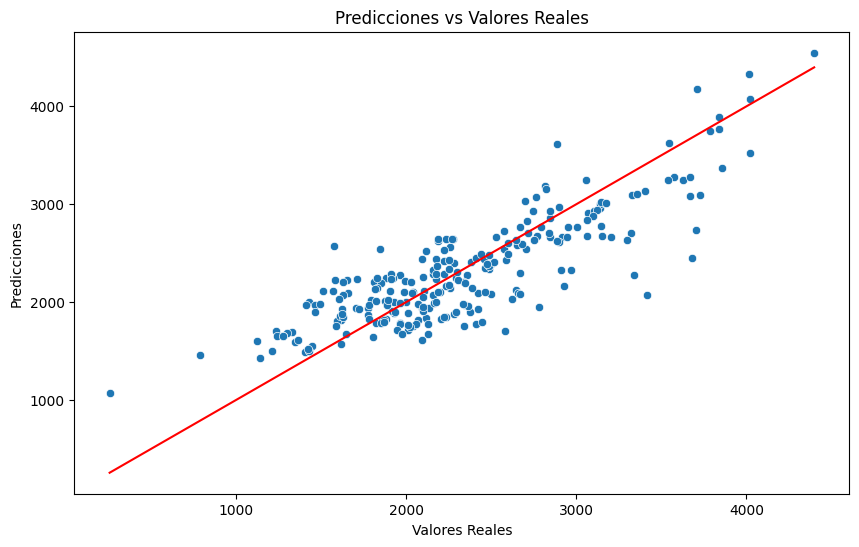

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predictions})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

# Mostrar el gráfico
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1) # Variables independientes
y = df['Calories'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

# Asumiendo que 'df' es tu DataFrame y que 'Calories' es la columna objetivo
X = df.drop('Calories', axis=1) # Variables independientes
y = df['Calories'] # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Para predecir
predicted_labels = model.predict(X_test)

Precisión: 0.0


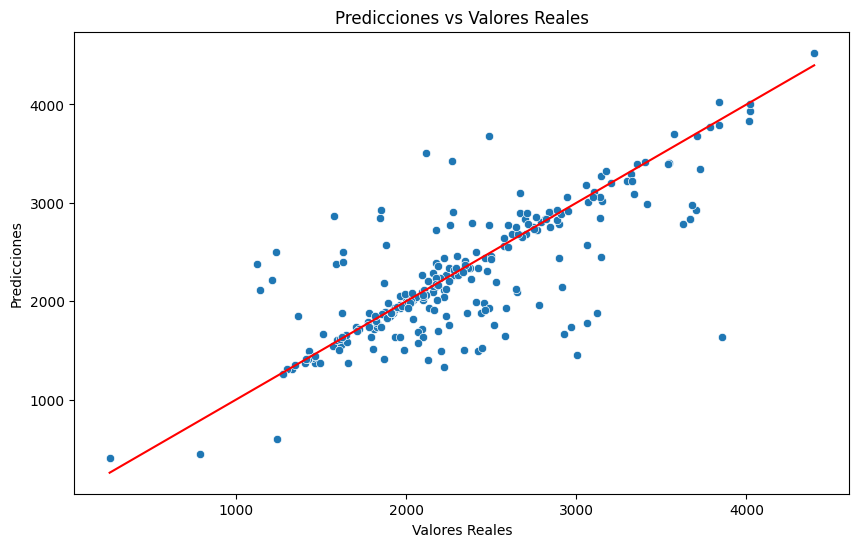

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que 'y_test' son los valores reales y 'predictions' son las predicciones del modelo
# Crear un DataFrame para facilitar la visualización
data = pd.DataFrame({'Real': y_test, 'Predicted': predicted_labels})

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicted', data=data)

# Añadir una línea de identidad para visualizar la alineación de las predicciones con los valores reales
sns.lineplot(x='Real', y='Real', data=data, color='red')

# Añadir títulos y etiquetas
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')

from sklearn.metrics import accuracy_score

# Suponiendo que predicted_labels son las predicciones de tu modelo
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Precisión: {accuracy}")

# Mostrar el gráfico
plt.show()

In [10]:
import pandas as pd

# contruyamos una categoria
min_value = df['TotalSteps'].min()
max_value = df['TotalSteps'].max()
range_size = (max_value - min_value) / 5

# Definir los intervalos y los nombres de las categorías
bins = [min_value, min_value + range_size, min_value + 2*range_size, min_value + 3*range_size, min_value + 4*range_size, max_value]
labels = ['trainer', 'yunior', 'middle', 'athlean', 'pro']

# Crear la nueva columna 'TotalstepsCat'
df['TotalStepsCat'] = pd.cut(df['TotalSteps'], bins=bins, labels=labels)

# Eliminar filas donde 'TotalStepsCat' no tiene valores
df = df.dropna(subset=['TotalStepsCat'])


In [11]:
# hagamos 5 conjuntos
step1 = []
step2 = []
step3 = []
step4 = []
step5 = []

# Iterar sobre las filas del DataFrame
for index, row in df.iterrows():
    if row['TotalStepsCat'] == 'trainer':
        step1.append(float(row['TotalSteps']))
    elif row['TotalStepsCat'] == 'yunior':
        step2.append(float(row['TotalSteps']))
    elif row['TotalStepsCat'] == 'middle':
        step3.append(float(row['TotalSteps']))
    elif row['TotalStepsCat'] == 'athlean':
        step4.append(float(row['TotalSteps']))
    elif row['TotalStepsCat'] == 'pro':
        step5.append(float(row['TotalSteps']))

from scipy.stats import f_oneway
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Realiza la prueba ANOVA
f_stat, p_value = f_oneway(step1, step2, step4, step4, step5)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

# Assuming df is your DataFrame and it contains the columns 'TotalSteps' and 'TotalStepsCat'
modelo = ols('TotalSteps ~ C(TotalStepsCat)', data=df).fit()
anova_results = sm.stats.anova_lm(modelo, typ=1)

AttributeError: module 'numpy' has no attribute 'MachAr'

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realiza la prueba post-hoc de Tukey
tukey_results = pairwise_tukeyhsd(endog=df['TotalSteps'], groups=df['TotalStepsCat'], alpha=0.05)

# Muestra los resultados
print(tukey_results) 

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
 group1  group2   meandiff  p-adj    lower       upper    reject
----------------------------------------------------------------
athlean  middle  -7455.8274 0.001  -9008.6792  -5902.9756   True
athlean     pro   8558.6429 0.001   4442.5348   12674.751   True
athlean trainer  -20131.263 0.001 -21604.0158 -18658.5103   True
athlean  yunior -13810.6753 0.001 -15283.9858 -12337.3649   True
 middle     pro  16014.4703 0.001  12126.2692  19902.6714   True
 middle trainer -12675.4356 0.001 -13262.6007 -12088.2704   True
 middle  yunior  -6354.8479 0.001  -6943.4105  -5766.2853   True
    pro trainer -28689.9059 0.001 -32546.8166 -24832.9952   True
    pro  yunior -22369.3182 0.001 -26226.4419 -18512.1945   True
trainer  yunior   6320.5877 0.001   5998.0076   6643.1677   True
----------------------------------------------------------------


In [14]:
# Poblaciones normales
from scipy import stats

stat, p = stats.shapiro(step1)

print('Group1 - Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p < 0.05:
    print("There is evidence to reject the null hypothesis that the values follow a normal distribution.")
else:
    print("There is not enough evidence to reject the null hypothesis that the values follow a normal distribution.")


Group1 - Shapiro-Wilk Test: Statistics=0.955, p=0.000
There is evidence to reject the null hypothesis that the values follow a normal distribution.


In [15]:
# Test de Levene
stat, p = stats.levene(step1, step2, step3, step4, step5)
print('Levene Test: Statistics=%.3f, p=%.3f' % (stat, p))

#test de breusch-pagan
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan

# Extrae los residuos y las variables independientes (predictores) ajustadas
residuos = modelo.resid
variables_independientes = modelo.model.exog

# Realiza el test de Breusch-Pagan
bp_test = het_breuschpagan(residuos, variables_independientes)

print(f'Valor de estadístico de Lagrange: {bp_test[0]}')
print(f'p-valor del test: {bp_test[1]}')
print(f'Valor del estadístico F: {bp_test[2]}')
print(f'p-valor del test F: {bp_test[3]}')


Levene Test: Statistics=3.139, p=0.014


AttributeError: module 'numpy' has no attribute 'MachAr'

In [16]:
from statsmodels.stats.stattools import durbin_watson

# Calcula el estadístico de Durbin-Watson
dw = durbin_watson(modelo.resid)

print(f"Estadístico de Durbin-Watson: {dw}")

alpha =0.5

if 2 - alpha <= dw <= 2 + alpha:
    print("The residuals are uncorrelated.")
elif dw > 2 + 0.5:
    print("There is a positive autocorrelation.")
else:
    print("There is a negative autocorrelation.")

NameError: name 'modelo' is not defined

# PCA

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
# Utilizamos los datos de las variables independientes y de la variable de salida.
datos_pca = df[['TotalSteps', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']]
# Estandarizar solo las columnas numéricas
numeric_columns = datos_pca.select_dtypes(include=np.number).columns
scaler = StandardScaler()
resultados_scaled = scaler.fit_transform(datos_pca[numeric_columns])

NameError: name 'np' is not defined

In [ ]:
# Aplicar PCA
pca = PCA(n_components=2)
pca_resultados = pca.fit_transform(resultados_scaled)
print(pca_resultados)

[[ 0.74677207  0.02001555]
 [ 3.454499    0.82971496]
 [ 1.57427374  0.10198889]
 ...
 [ 0.74971521 -0.66988954]
 [ 5.38217725  2.10032546]
 [-0.26379041  0.02817296]]


In [ ]:
# Análisis de los componentes principales
componentes_principales_df = pd.DataFrame(pca.components_, columns=numeric_columns)

# Identificar características más importantes para los primeros dos componentes principales
componente_principal_1 = componentes_principales_df.iloc[0]
componente_principal_2 = componentes_principales_df.iloc[1]

# Obtener las características más importantes para el primer componente principal (PC1)
caracteristicas_importantes_pc1 = componente_principal_1.abs().nlargest(5).index
print("Las 5 características más importantes para el primer componente principal (PC1) son:")
for i, caracteristica in enumerate(caracteristicas_importantes_pc1, start=1):
    print(f"{i}. {caracteristica}")

# Obtener las características más importantes para el segundo componente principal (PC2)
caracteristicas_importantes_pc2 = componente_principal_2.abs().nlargest(5).index
print("\nLas 5 características más importantes para el segundo componente principal (PC2) son:")
for i, caracteristica in enumerate(caracteristicas_importantes_pc2, start=1):
    print(f"{i}. {caracteristica}")


Las 5 características más importantes para el primer componente principal (PC1) son:
1. TotalSteps
2. TotalDistance
3. VeryActiveDistance
4. VeryActiveMinutes
5. LightActiveDistance

Las 5 características más importantes para el segundo componente principal (PC2) son:
1. LightlyActiveMinutes
2. LightActiveDistance
3. VeryActiveDistance
4. VeryActiveMinutes
5. SedentaryMinutes


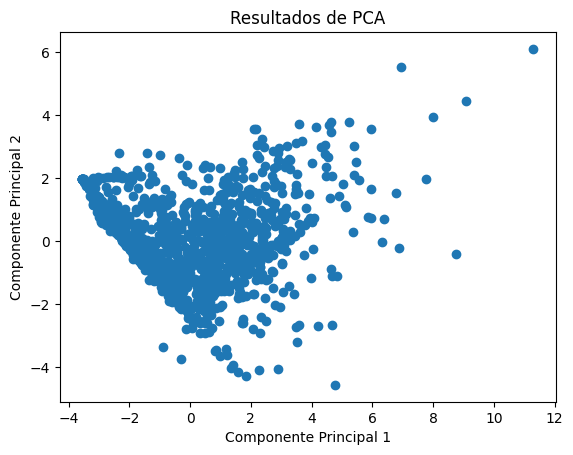

In [ ]:
# Visualizar los resultados de PCA
plt.scatter(pca_resultados[:, 0], pca_resultados[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Resultados de PCA')
plt.show()

Varianza explicada:
Componente principal 1: 43.02%
Componente principal 2: 17.98%

Varianza acumulada:
Hasta el componente principal 1: 43.02%
Hasta el componente principal 2: 61.00%


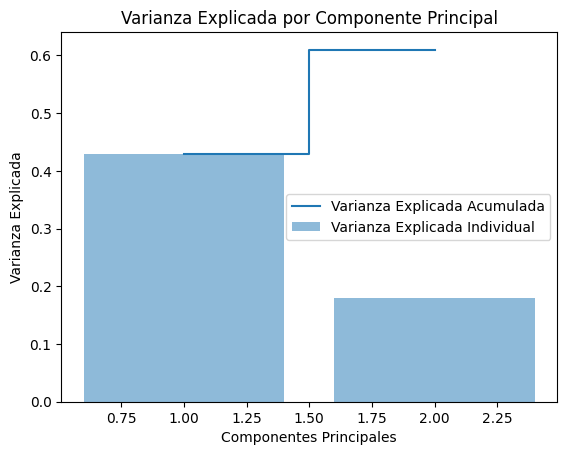

In [ ]:
# Calcular la varianza explicada
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

print("Varianza explicada:")
for i, varianza in enumerate(varianza_explicada, start=1):
    print(f"Componente principal {i}: {varianza:.2%}")

print("\nVarianza acumulada:")
for i, varianza_acum in enumerate(varianza_acumulada, start=1):
    print(f"Hasta el componente principal {i}: {varianza_acum:.2%}")

# Visualizar la varianza explicada
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.5, align='center', label='Varianza Explicada Individual')
plt.step(range(1, len(varianza_explicada) + 1), varianza_acumulada, where='mid', label='Varianza Explicada Acumulada')
plt.xlabel('Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')
plt.legend()
plt.show()

Componentes principales 1 y 2:
  TotalSteps    TotalDistance    VeryActiveDistance    ModeratelyActiveDistance    LightActiveDistance    SedentaryActiveDistance    VeryActiveMinutes    FairlyActiveMinutes    LightlyActiveMinutes    SedentaryMinutes
------------  ---------------  --------------------  --------------------------  ---------------------  -------------------------  -------------------  ---------------------  ----------------------  ------------------
   0.46912          0.463998               0.351288                   0.287389                0.301749                  0.0226786             0.338048              0.289675                 0.232738           -0.121305
   0.0028468        0.0448743              0.385562                   0.0496686              -0.517043                 -0.0631699             0.383289              0.0896955               -0.589831            0.269579


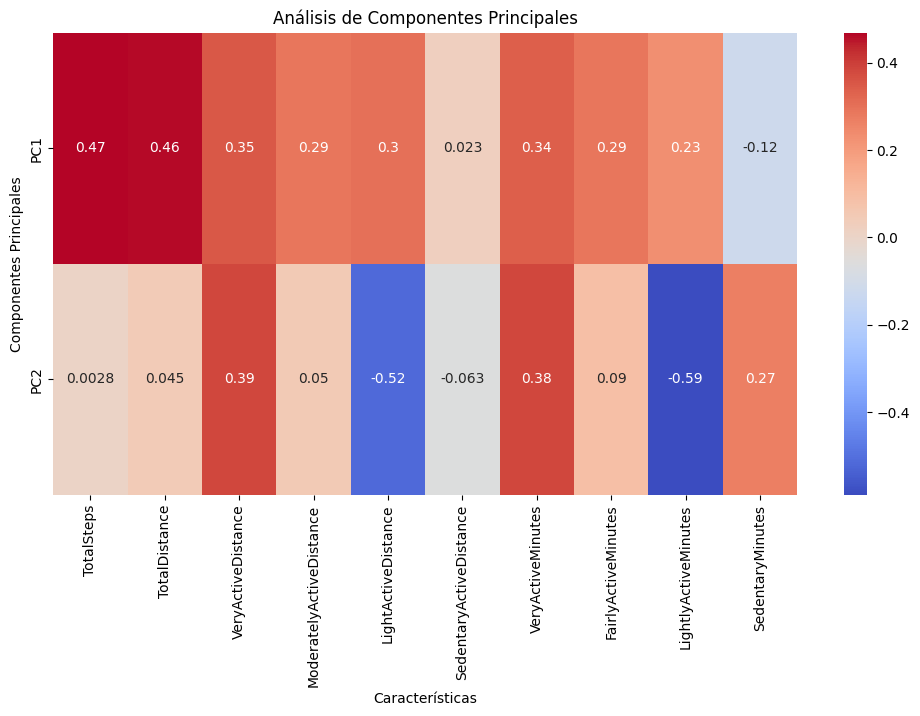

In [ ]:
from tabulate import tabulate

# Seleccionar solo los componentes principales 1 y 2
componentes_principales_1_2 = componentes_principales_df.iloc[:2]

# Convertir el DataFrame de componentes principales 1 y 2 en una lista de listas para tabulate
componentes_principales_1_2_lista = componentes_principales_1_2.values.tolist()

# Obtener los nombres de las características originales como encabezados de la tabla
encabezados = componentes_principales_1_2.columns.tolist()

# Imprimir los componentes principales 1 y 2 en forma de tabla
print("Componentes principales 1 y 2:")
print(tabulate(componentes_principales_1_2_lista, headers=encabezados))

plt.figure(figsize=(12, 6))
sns.heatmap(componentes_principales_df, annot=True, cmap='coolwarm', yticklabels=['PC1', 'PC2'], xticklabels=numeric_columns)
plt.title('Análisis de Componentes Principales')
plt.xlabel('Características')
plt.ylabel('Componentes Principales')
plt.show()
